<a href="https://colab.research.google.com/github/marpom03/fruit_recognition_Keras/blob/main/fruit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**fruit image recognition** - the first step in machine learning

Designing a simple convolutional neural network (CNN) model for fruit image classification – bananas and oranges – using the Keras library in TensorFlow. The code is an example of the process of creating, training, and using the model.

The training set contains 440 images of bananas and an equal number of orange images. The test set contains 102 images each of bananas and oranges. They have been taken from various angles with different lighting and backgrounds. They were then specially prepared for training by standardizing their size, and orientation, and sharpening the edges.

In [ ]:
# Paths for training and testing data

train_path = r'/content/drive/MyDrive/fruit_recognation/Training'
test_path = r'/content/drive/MyDrive/fruit_recognation/Test'

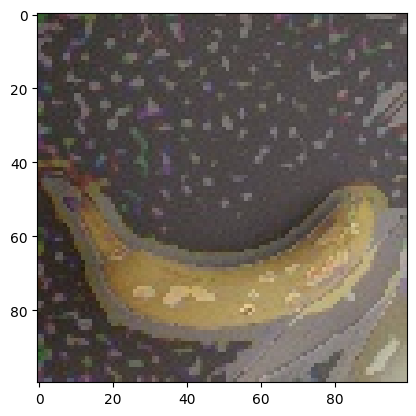

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img

# Example image

img = load_img(r'/content/drive/MyDrive/fruit_recognation/Training/banana/89.jpg')
plt.imshow(img)
plt.axis("on")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Building the model - CNN - Convolutional Neural Network

model = Sequential()
model.add(Conv2D(128, 3, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        73792     
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 32)       

In [ ]:
# Compiling the model

model.compile(loss='categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['acc'])

In [ ]:
# Data generators

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(100,100),
                                                  batch_size = 32,
                                                  color_mode= "rgb",
                                                  class_mode = "categorical")

Found 880 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [ ]:
# Printing the labels of the test dataset provided by the test_generator

print(test_generator.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Training the model

history = model.fit(train_generator,
                           steps_per_epoch = 27,
                           epochs = 4,
                           validation_data = test_generator,
                           validation_steps = 6)

Epoch 1/4
27/27 [==============================] - 55s 2s/step - loss: 0.6813 - acc: 0.5837 - val_loss: 0.6340 - val_acc: 1.0000
Epoch 2/4
27/27 [==============================] - 54s 2s/step - loss: 0.5942 - acc: 0.7807 - val_loss: 0.4999 - val_acc: 0.7604
Epoch 3/4
27/27 [==============================] - 53s 2s/step - loss: 0.4281 - acc: 0.8267 - val_loss: 0.2847 - val_acc: 0.9948
Epoch 4/4
27/27 [==============================] - 53s 2s/step - loss: 0.3034 - acc: 0.8892 - val_loss: 0.1184 - val_acc: 0.9896


In [ ]:
# Evaluating the model's performance on the test data

results = model.evaluate(test_generator)

7/7 [==============================] - 3s 377ms/step - loss: 0.1204 - acc: 0.9902


In [ ]:
# Retrieving the training history data and listing the available metrics in the history

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

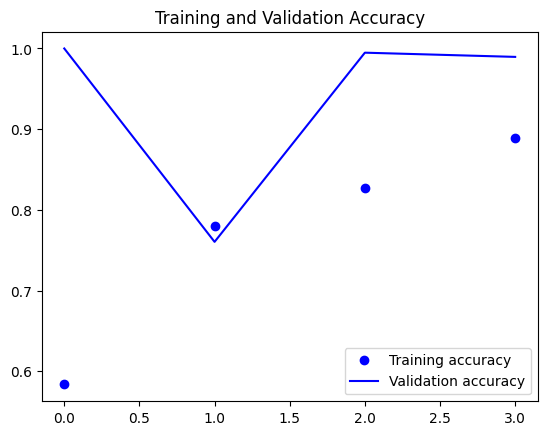

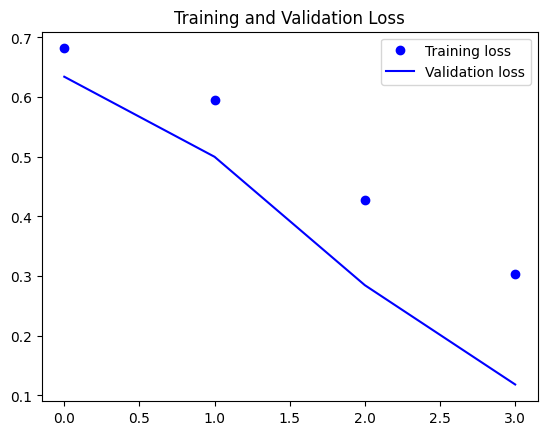

In [ ]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values from the training history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and validation accuracy

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

# Plotting training and validation loss

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
#Testing the model's accuracy in recognizing fruit based on random photos not included in the training or test dataset.

from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np

def predict_image(image_path):
    # Loading the image and converting it to the correct format
    img = load_img(image_path, target_size=(100, 100))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predicting the image class
    prediction = model.predict(img_array)

    # Returning the image class and the confidence percentage
    class_index = np.argmax(prediction, axis=1)
    confidence = np.max(prediction, axis=1) * 100

    if class_index == 0:
        return 'Banana', confidence[0]
    else:
        return 'Orange', confidence[0]


# Example usage
image_path = r'/content/orange22.jpg'
result, confidence = predict_image(image_path)
print(f"Predicted class for the image: {result} with confidence {confidence:.2f}%")


1/1 [==============================] - 0s 140ms/step
Predicted class for the image: Orange with confidence 90.02%


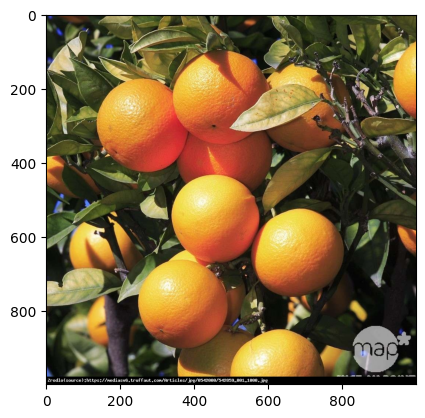

In [ ]:
img = load_img(r'/content/orange22.jpg')
plt.imshow(img)